In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, LSTM, GRU, Dropout, RepeatVector, TimeDistributed, Dense, LayerNormalization, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


df = pd.read_csv('df_for_learning.csv')
df = df.dropna().reset_index(drop=True)
df.tail(10)

,Unnamed: 0,timestamp,total_market_cap,total_volume_24h,total_volume_24h_reported,altcoin_market_cap,altcoin_volume_24h,altcoin_volume_24h_reported,log_total_volume_24h,log_altcoin_volume_24h,...,y39,y40,y41,y42,y43,y44,y45,y46,y47,y48
7720,7720,2025-04-17 19:25:00+00:00,2.669365e+12,4.777543e+10,2.914731e+11,9.899482e+11,3.362873e+10,2.144453e+11,24.589777,24.238647,...,-0.060991,-0.061265,-0.062589,-0.064223,-0.065088,-0.066018,-0.075863,-0.077471,-0.084986,-0.076113
7721,7721,2025-04-17 19:30:00+00:00,2.669767e+12,4.756190e+10,2.898814e+11,9.898805e+11,3.348018e+10,2.133219e+11,24.585298,24.234219,...,-0.056785,-0.058110,-0.059744,-0.060609,-0.061539,-0.071384,-0.072991,-0.080506,-0.071634,-0.063186
7722,7722,2025-04-17 19:35:00+00:00,2.669503e+12,4.692903e+10,2.874194e+11,9.898809e+11,3.333331e+10,2.118147e+11,24.571902,24.229823,...,-0.044714,-0.046348,-0.047213,-0.048143,-0.057988,-0.059596,-0.067111,-0.058238,-0.049790,-0.063109
7723,7723,2025-04-17 19:40:00+00:00,2.668440e+12,4.710940e+10,2.856194e+11,9.893160e+11,3.324329e+10,2.105582e+11,24.575738,24.227119,...,-0.050184,-0.051049,-0.051979,-0.061824,-0.063432,-0.070947,-0.062074,-0.053626,-0.066945,-0.062867
7724,7724,2025-04-17 19:45:00+00:00,2.666682e+12,4.636827e+10,2.841548e+11,9.886909e+11,3.303645e+10,2.098285e+11,24.559881,24.220877,...,-0.035192,-0.036122,-0.045967,-0.047575,-0.055090,-0.046217,-0.037769,-0.051088,-0.047010,-0.045823
7725,7725,2025-04-17 19:50:00+00:00,2.667334e+12,4.640793e+10,2.833309e+11,9.888902e+11,3.307136e+10,2.093825e+11,24.560736,24.221934,...,-0.036977,-0.046822,-0.048430,-0.055945,-0.047072,-0.038624,-0.051943,-0.047865,-0.046679,-0.038316
7726,7726,2025-04-17 19:55:00+00:00,2.666323e+12,4.663571e+10,2.826757e+11,9.882178e+11,3.303322e+10,2.090095e+11,24.565632,24.220779,...,-0.051718,-0.053326,-0.060841,-0.051968,-0.043520,-0.056839,-0.052761,-0.051575,-0.043212,-0.044928
7727,7727,2025-04-17 20:00:00+00:00,2.666281e+12,4.646617e+10,2.821409e+11,9.884256e+11,3.290034e+10,2.087417e+11,24.561990,24.216749,...,-0.049684,-0.057199,-0.048326,-0.039878,-0.053197,-0.049119,-0.047933,-0.039570,-0.041286,-0.040584
7728,7728,2025-04-17 20:05:00+00:00,2.666941e+12,4.633273e+10,2.810507e+11,9.888142e+11,3.286365e+10,2.082872e+11,24.559114,24.215633,...,-0.054323,-0.045450,-0.037002,-0.050321,-0.046244,-0.045057,-0.036695,-0.038411,-0.037709,-0.036355
7729,7729,2025-04-17 20:10:00+00:00,2.667675e+12,4.605845e+10,2.765732e+11,9.890267e+11,3.272674e+10,2.056430e+11,24.553177,24.211458,...,-0.039513,-0.031065,-0.044383,-0.040306,-0.039119,-0.030757,-0.032473,-0.031771,-0.030418,-0.033164


In [113]:
df.shape, df.columns.tolist()

((7730, 103),
 ['Unnamed: 0',
  'timestamp',
  'total_market_cap',
  'total_volume_24h',
  'total_volume_24h_reported',
  'altcoin_market_cap',
  'altcoin_volume_24h',
  'altcoin_volume_24h_reported',
  'log_total_volume_24h',
  'log_altcoin_volume_24h',
  'vol_pct_1',
  'alt_pct_1',
  'log_total_cap',
  'log_altcoin_cap',
  'vol_to_cap',
  'alt_to_cap',
  'value',
  'btc_dominance',
  'active_cryptocurrencies',
  'active_market_pairs',
  'active_exchanges',
  'log_market_pairs',
  'log_val_diff',
  'log_alt_diff',
  'zscore_12',
  'volume_ratio',
  'log_total_volume_24h_reported',
  'log_altcoin_volume_24h_reported',
  'hour',
  'dow',
  'month',
  'hour_sin',
  'hour_cos',
  'dow_sin',
  'dow_cos',
  'month_sin',
  'month_cos',
  'vol_mean_12',
  'vol_std_12',
  'alt_mean_12',
  'alt_std_12',
  'cap_mean_12',
  'cap_std_12',
  'vol_mean_24',
  'vol_std_24',
  'alt_mean_24',
  'alt_std_24',
  'cap_mean_24',
  'cap_std_24',
  'vol_mean_288',
  'vol_std_288',
  'alt_mean_288',
  'alt_st

In [114]:
df["trend_1h"] = df["log_total_volume_24h"].diff(12)
df["trend_3h"] = df["log_total_volume_24h"].diff(36)
df["trend_6h"] = df["log_total_volume_24h"].diff(72)

featured_cols = [
    'zscore_12',
    'vol_mean_12',
    'vol_std_12',
    'alt_mean_12',
    'alt_std_12',
    'cap_mean_12',
    'cap_std_12',
    'vol_mean_24',
    'vol_std_24',
    'alt_mean_24',
    'alt_std_24',
    'cap_mean_24',
    'cap_std_24',
    'vol_mean_288',
    'vol_std_288',
    'alt_mean_288',
    'alt_std_288',
    'cap_mean_288',
    'cap_std_288',
    'log_market_pairs',
    'log_total_cap',
    'log_altcoin_cap',
    'volume_ratio',
    'dow_sin',
    'dow_cos',
    'hour_sin',
    'hour_cos',
    'trend_1h',
    'trend_3h',
    'trend_6h',
]
target_cols = [f'y{i}' for i in range(1, 49)]
df = df[featured_cols + target_cols]
df = df.dropna().reset_index(drop=True)
df.tail(10)

,zscore_12,vol_mean_12,vol_std_12,alt_mean_12,alt_std_12,cap_mean_12,cap_std_12,vol_mean_24,vol_std_24,alt_mean_24,...,y39,y40,y41,y42,y43,y44,y45,y46,y47,y48
7648,-1.697058,24.611383,0.012731,24.254378,0.008505,28.612739,0.000160,24.624480,0.016947,24.262583,...,-0.060991,-0.061265,-0.062589,-0.064223,-0.065088,-0.066018,-0.075863,-0.077471,-0.084986,-0.076113
7649,-1.635227,24.608019,0.013895,24.252086,0.009932,28.612759,0.000178,24.621645,0.017588,24.260799,...,-0.056785,-0.058110,-0.059744,-0.060609,-0.061539,-0.071384,-0.072991,-0.080506,-0.071634,-0.063186
7650,-1.940290,24.603690,0.016383,24.249494,0.011370,28.612754,0.000171,24.618343,0.019176,24.258862,...,-0.044714,-0.046348,-0.047213,-0.048143,-0.057988,-0.059596,-0.067111,-0.058238,-0.049790,-0.063109
7651,-1.415724,24.599718,0.016938,24.246587,0.012302,28.612745,0.000182,24.615920,0.020736,24.256923,...,-0.050184,-0.051049,-0.051979,-0.061824,-0.063432,-0.070947,-0.062074,-0.053626,-0.066945,-0.062867
7652,-1.839840,24.594494,0.018813,24.243105,0.013218,28.612681,0.000314,24.612574,0.023005,24.254735,...,-0.035192,-0.036122,-0.045967,-0.047575,-0.055090,-0.046217,-0.037769,-0.051088,-0.047010,-0.045823
7653,-1.496630,24.589531,0.019240,24.239814,0.013158,28.612610,0.000343,24.609268,0.024531,24.252563,...,-0.036977,-0.046822,-0.048430,-0.055945,-0.047072,-0.038624,-0.051943,-0.047865,-0.046679,-0.038316
7654,-1.070546,24.585319,0.018389,24.236609,0.012670,28.612534,0.000428,24.606618,0.025689,24.250444,...,-0.051718,-0.053326,-0.060841,-0.051968,-0.043520,-0.056839,-0.052761,-0.051575,-0.043212,-0.044928
7655,-1.103390,24.581086,0.017306,24.233293,0.012178,28.612444,0.000480,24.603542,0.026449,24.248144,...,-0.049684,-0.057199,-0.048326,-0.039878,-0.053197,-0.049119,-0.047933,-0.039570,-0.041286,-0.040584
7656,-1.117452,24.576939,0.015951,24.230205,0.011491,28.612371,0.000483,24.600192,0.026784,24.245855,...,-0.054323,-0.045450,-0.037002,-0.050321,-0.046244,-0.045057,-0.036695,-0.038411,-0.037709,-0.036355
7657,-1.277955,24.573058,0.015557,24.227300,0.011453,28.612352,0.000484,24.596725,0.027276,24.243494,...,-0.039513,-0.031065,-0.044383,-0.040306,-0.039119,-0.030757,-0.032473,-0.031771,-0.030418,-0.033164


In [115]:
def prepare_data(df, featured_cols=featured_cols, target_cols=target_cols):
    X = df[featured_cols].to_numpy()
    y = df[target_cols].to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        shuffle=False
    )

    scaler_x = MinMaxScaler()

    scaled_y_train = []
    scaled_y_test = []
    scalers_y = []
    for i, col in enumerate(target_cols):
        scaler_y = MinMaxScaler()
        y_train_scaled_col = scaler_y.fit_transform(y_train[:, i].reshape(-1, 1))
        y_test_scaled_col = scaler_y.transform(y_test[:, i].reshape(-1, 1))
        scaled_y_test.append(y_test_scaled_col)
        scaled_y_train.append(y_train_scaled_col)
        scalers_y.append(scaler_y)

    y_train_scaled = np.concatenate(scaled_y_train, axis=1)
    y_test_scaled = np.concatenate(scaled_y_test, axis=1)

    X_train_scaled = scaler_x.fit_transform(X_train)
    X_test_scaled = scaler_x.transform(X_test)

    return X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler_x, scalers_y

def create_sequences(X, y, n_lags=288, horizon=48):
    Xs, ys = [], []
    for i in range(len(X) - n_lags - horizon):
        Xs.append(X[i:i + n_lags])
        ys.append(y[i + n_lags:i + n_lags + horizon, :])

    return np.array(Xs), np.array(ys)


In [74]:
import tensorflow.keras.backend as K

def combined_loss(y_true, y_pred):
    mse = K.mean(K.square(y_true - y_pred))

    trend_true = y_true[:, 1:, :] - y_true[:, :-1, :]
    trend_pred = y_pred[:, 1:, :] - y_pred[:, :-1, :]

    trend_true = K.clip(trend_true, -1.0, 1.0)
    trend_pred = K.clip(trend_pred, -1.0, 1.0)

    trend_mse = K.mean(K.square(trend_true - trend_pred))

    return 0.7 * mse + 0.3 * trend_mse

In [79]:

def build_gru_seq2seq(n_lags, n_features, horizon, units=128, dropout=0.3):
    encoder_inputs = Input(shape=(n_lags, n_features))
    encoder = GRU(units=units, return_sequences=True)(encoder_inputs)
    encoder = LayerNormalization()(encoder)
    encoder = GRU(units=units, return_sequences=False)(encoder)
    encoder_output = Dropout(dropout)(encoder)

    decoder_input = RepeatVector(horizon)(encoder_output)
    decoder = GRU(units=units, dropout=dropout, return_sequences=True)(decoder_input)
    decoder = LayerNormalization()(decoder)
    decoder = GRU(units=units, return_sequences=True)(decoder)
    decoder_dropout = Dropout(dropout)(decoder)
    decoder_output = TimeDistributed(Dense(1))(decoder_dropout)

    model = Model(encoder_inputs, decoder_output)
    optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='mse')

    return model

In [99]:
X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler_x, scalers_y = prepare_data(df, featured_cols, target_cols)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, n_lags=288)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, n_lags=288)

print("NaNs in y_train_seq:", np.isnan(y_train_seq).sum())
print("Infs in y_train_seq:", np.isinf(y_train_seq).sum())
print("y_train_seq shape:", y_train_seq.shape)
print("y_train_seq stats — min:", y_train_seq.min(), "max:", y_train_seq.max(), "std:", y_train_seq.std())
print("NaNs in X_train_seq:", np.isnan(X_train_seq).sum())
print("Infs in X_train_seq:", np.isinf(X_train_seq).sum())

model_gru = build_gru_seq2seq(n_lags=288, n_features=X_train_seq.shape[2], horizon=48, units=128, dropout=0.2)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)
history = model_gru.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)

NaNs in y_train_seq: 0
Infs in y_train_seq: 0
y_train_seq shape: (5790, 48, 48)
y_train_seq stats — min: 0.0 max: 1.0 std: 0.10520705891812877
NaNs in X_train_seq: 0
Infs in X_train_seq: 0
Epoch 1/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - loss: 0.2451
Epoch 1: val_loss improved from inf to 0.00619, saving model to best_model.h5


181/181 ━━━━━━━━━━━━━━━━━━━━ 71s 371ms/step - loss: 0.2441 - val_loss: 0.0062 - learning_rate: 0.0010
Epoch 2/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - loss: 0.0084
Epoch 2: val_loss did not improve from 0.00619
181/181 ━━━━━━━━━━━━━━━━━━━━ 67s 369ms/step - loss: 0.0084 - val_loss: 0.0064 - learning_rate: 0.0010
Epoch 3/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - loss: 0.0073
Epoch 3: val_loss did not improve from 0.00619
181/181 ━━━━━━━━━━━━━━━━━━━━ 64s 354ms/step - loss: 0.0073 - val_loss: 0.0071 - learning_rate: 0.0010
Epoch 4/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - loss: 0.0069
Epoch 4: val_loss did not improve from 0.00619
181/181 ━━━━━━━━━━━━━━━━━━━━ 64s 354ms/step - loss: 0.0069 - val_loss: 0.0070 - learning_rate: 0.0010
Epoch 5/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - loss: 0.0065
Epoch 5: val_loss did not improve from 0.00619
181/181 ━━━━━━━━━━━━━━━━━━━━ 63s 348ms/step - loss: 0.0065 - val_loss: 0.0075 - learning_rate: 0.0010
Epoch 6/100
181/181 ━━

In [100]:
def pred_n_metrics(X_test_seq, y_test_seq, model, scalers_y):
    y_pred_scaled = model.predict(X_test_seq)
    y_pred = np.column_stack([
        scalers_y[i].inverse_transform(y_pred_scaled[:, i, :])[:, 0] for i in range(48)
    ])
    y_true = np.column_stack([
        scalers_y[i].inverse_transform(y_test_seq[:, i, :])[:, 0] for i in range(48)
    ])

    mae_per_horizon = [mean_absolute_error(y_true[:, i], y_pred[:, i]) for i in range(48)]
    r2_per_horizon = [r2_score(y_true[:, i], y_pred[:, i]) for i in range(48)]

    print(f"Mean MAE: {np.mean(mae_per_horizon):.4f}")
    print(f"Mean R²: {np.mean(r2_per_horizon):.4f}")

    return y_pred, y_true

def visualization(y_true, y_pred, model_name):
    i = -1
    plt.figure(figsize=(12, 5))
    plt.plot(y_true[i], label='Actual')
    plt.plot(y_pred[i], label='Predicted')
    plt.title(f'{model_name} Volume Prediction On 48 Steps (240 minutes)')
    plt.xlabel('Prediction Step')
    plt.ylabel('log(volume_24h)')
    plt.legend()
    plt.grid()
    plt.show()

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step
Mean MAE: 0.0585
Mean R²: -2.5616


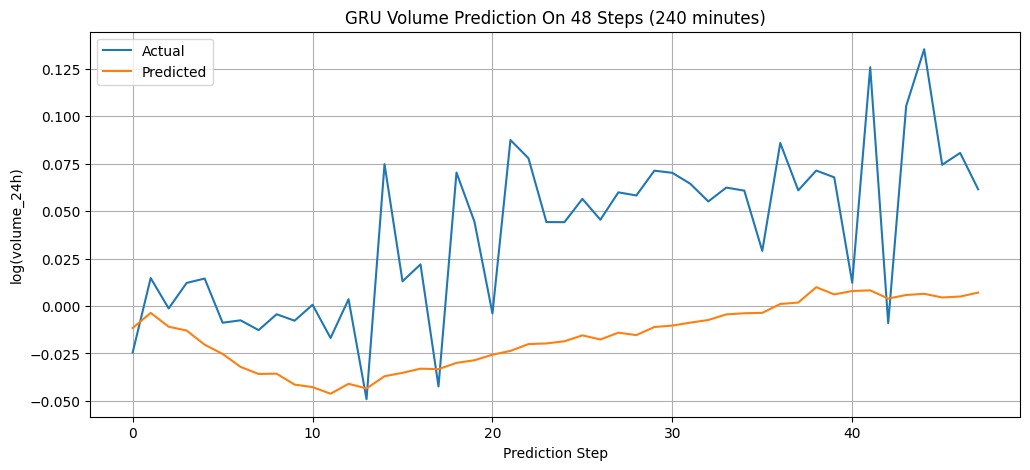

In [101]:
y_pred, y_true = pred_n_metrics(X_test_seq, y_test_seq, model_gru, scalers_y)
visualization(y_true, y_pred, model_name='GRU')

In [106]:
from tensorflow.python.keras.layers import Lambda


def build_cnn_gru(n_lags, n_features, horizon):
    inputs = Input(shape=(n_lags, n_features))
    x = Conv1D(filters=64, kernel_size=3, padding='causal', activation='relu')(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = GRU(128, return_sequences=True)(x)
    x = GRU(128, return_sequences=True)(x)
    x = Lambda(lambda t: t[:, -horizon:, :])(x)
    x = TimeDistributed(Dense(horizon))(x)
    model = Model(inputs, x)
    optimizer = Adam(learning_rate=0.001, clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='mse')

    return model

In [107]:
X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, scaler_x, scalers_y = prepare_data(df, featured_cols, target_cols)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, n_lags=288)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, n_lags=288)

model_gru_cnn = build_cnn_gru(n_lags=288, n_features=X_train_seq.shape[2], horizon=48)

early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)
checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)
history = model_gru_cnn.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)

Epoch 1/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 0.0276
Epoch 1: val_loss improved from inf to 0.00514, saving model to best_model.h5


181/181 ━━━━━━━━━━━━━━━━━━━━ 30s 156ms/step - loss: 0.0275 - val_loss: 0.0051 - learning_rate: 0.0010
Epoch 2/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 0.0040
Epoch 2: val_loss did not improve from 0.00514
181/181 ━━━━━━━━━━━━━━━━━━━━ 31s 169ms/step - loss: 0.0040 - val_loss: 0.0063 - learning_rate: 0.0010
Epoch 3/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 0.0033
Epoch 3: val_loss did not improve from 0.00514
181/181 ━━━━━━━━━━━━━━━━━━━━ 31s 168ms/step - loss: 0.0033 - val_loss: 0.0057 - learning_rate: 0.0010
Epoch 4/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0029
Epoch 4: val_loss did not improve from 0.00514
181/181 ━━━━━━━━━━━━━━━━━━━━ 30s 163ms/step - loss: 0.0029 - val_loss: 0.0108 - learning_rate: 0.0010
Epoch 5/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.0028
Epoch 5: val_loss did not improve from 0.00514
181/181 ━━━━━━━━━━━━━━━━━━━━ 31s 168ms/step - loss: 0.0028 - val_loss: 0.0091 - learning_rate: 0.0010
Epoch 6/100
181/181 ━━

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step
Mean MAE: 0.0274
Mean R²: -0.0817


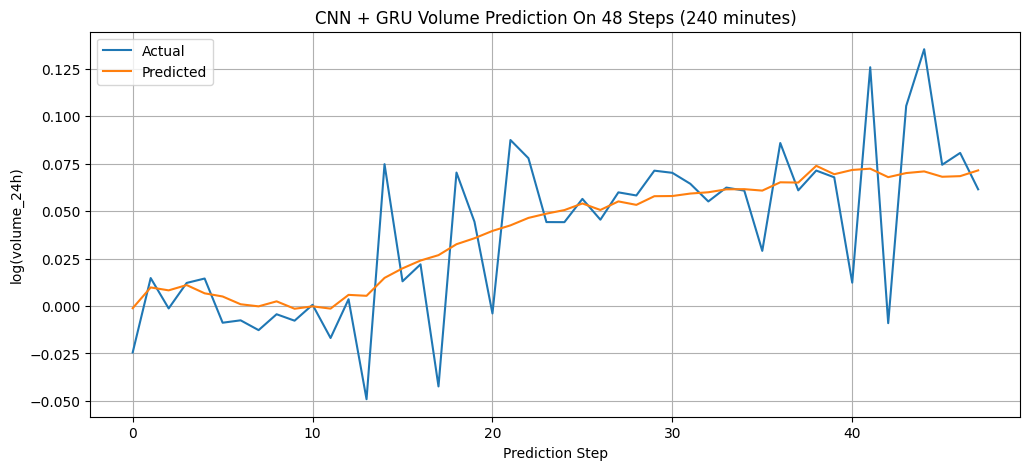

In [108]:
y_pred, y_true = pred_n_metrics(X_test_seq, y_test_seq, model_gru_cnn, scalers_y)
visualization(y_true, y_pred, model_name='CNN + GRU')

In [129]:
class SklearnWrapper:
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return y_pred[..., np.newaxis]


def linear_regression(X_train, y_train, X_test, y_test, scalers_y):
    model = LinearRegression()

    y_train_last = y_train[:, -1, 0]
    y_test_last = y_test[:, -1, 0]

    model.fit(X_train, y_train_last)
    y_pred_scaled = model.predict(X_test).reshape(-1, 1)  # [samples, 1]

    y_pred = scalers_y[0].inverse_transform(y_pred_scaled)[:, 0]
    y_true = scalers_y[0].inverse_transform(y_test_last.reshape(-1, 1))[:, 0]

    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Linear Regression (last step) — MAE: {mae:.4f}")
    print(f"Linear Regression (last step) — R²: {r2:.4f}")

    plt.figure(figsize=(12, 5))
    plt.plot(y_true, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title("Linear Regression Prediction on t+48 Step")
    plt.legend()
    plt.grid()
    plt.show()

    return y_pred


In [124]:
from tensorflow.keras.layers import Lambda

def lstm_regression(X_train_seq, y_train_seq, X_test_seq, y_test_seq, scalers_y, horizon=48):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

    model = Sequential([
        LSTM(128, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
        Dropout(0.3),
        LSTM(128, return_sequences=True),
        Dropout(0.3),
        Lambda(lambda x: x[:, -48:, :]),  # обрезаем до 48
        TimeDistributed(Dense(1))
    ])

    model.compile(optimizer='adam', loss='mse')

    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
    checkpoint = ModelCheckpoint('best_lstm_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

    model.fit(
        X_train_seq, y_train_seq[..., [0]],  # [samples, 48, 1]
        validation_data=(X_test_seq, y_test_seq[..., [0]]),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping, reduce_lr, checkpoint],
        verbose=1
    )

    y_pred_scaled = model.predict(X_test_seq)  # [samples, 48, 1]

    y_pred = np.array([
        scalers_y[0].inverse_transform(y_pred_scaled[:, i, :])[:, 0] for i in range(horizon)
    ]).T
    y_true = np.array([
        scalers_y[0].inverse_transform(y_test_seq[:, i, 0].reshape(-1, 1))[:, 0] for i in range(horizon)
    ]).T

    mae = [mean_absolute_error(y_true[:, i], y_pred[:, i]) for i in range(horizon)]
    r2 = [r2_score(y_true[:, i], y_pred[:, i]) for i in range(horizon)]

    print(f"LSTM — Mean MAE: {np.mean(mae):.4f}")
    print(f"LSTM — Mean R²: {np.mean(r2):.4f}")

    plt.figure(figsize=(12, 5))
    plt.plot(y_true[-1], label='Actual')
    plt.plot(y_pred[-1], label='Predicted')
    plt.title("LSTM Prediction on 48 Steps")
    plt.legend()
    plt.grid()
    plt.show()

    return y_pred

Linear Regression (last step) — MAE: 0.9936
Linear Regression (last step) — R²: -20684.0449


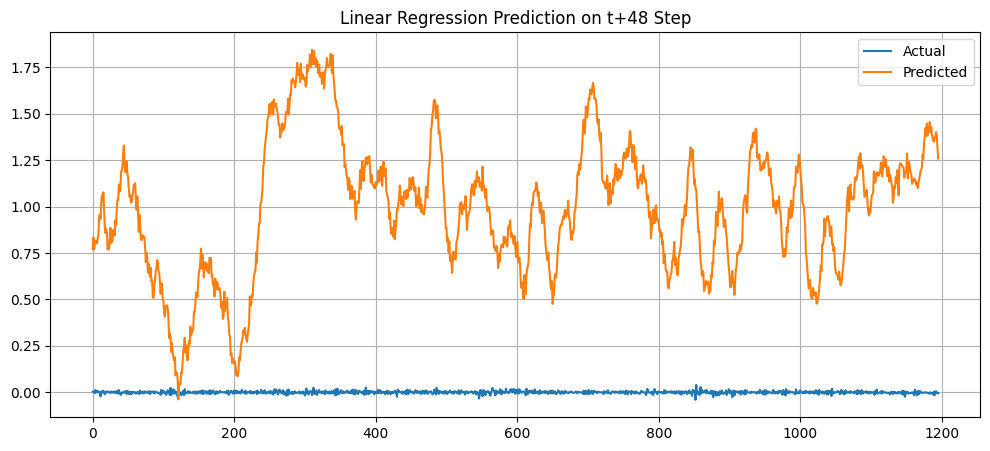

In [130]:
X_train_flat = X_train_seq.reshape((X_train_seq.shape[0], -1))
X_test_flat = X_test_seq.reshape((X_test_seq.shape[0], -1))

y_train_single = y_train_seq[..., 0]
y_test_single = y_test_seq[..., 0]

y_pred_lr = linear_regression(X_train_flat, y_train_single, X_test_flat, y_test_single, scalers_y)

/Users/dariapavlova/Documents/defi_trends_analysis/.ven311/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 0.0149
Epoch 1: val_loss improved from inf to 0.00379, saving model to best_lstm_model.h5


181/181 ━━━━━━━━━━━━━━━━━━━━ 60s 311ms/step - loss: 0.0148 - val_loss: 0.0038 - learning_rate: 0.0010
Epoch 2/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - loss: 0.0031
Epoch 2: val_loss did not improve from 0.00379
181/181 ━━━━━━━━━━━━━━━━━━━━ 57s 313ms/step - loss: 0.0031 - val_loss: 0.0041 - learning_rate: 0.0010
Epoch 3/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - loss: 0.0026
Epoch 3: val_loss did not improve from 0.00379
181/181 ━━━━━━━━━━━━━━━━━━━━ 55s 302ms/step - loss: 0.0026 - val_loss: 0.0043 - learning_rate: 0.0010
Epoch 4/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 0.0025
Epoch 4: val_loss did not improve from 0.00379
181/181 ━━━━━━━━━━━━━━━━━━━━ 58s 316ms/step - loss: 0.0025 - val_loss: 0.0038 - learning_rate: 0.0010
Epoch 5/100
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 0.0024
Epoch 5: val_loss did not improve from 0.00379
181/181 ━━━━━━━━━━━━━━━━━━━━ 55s 301ms/step - loss: 0.0024 - val_loss: 0.0041 - learning_rate: 0.0010
Epoch 6/100
181/181 ━━

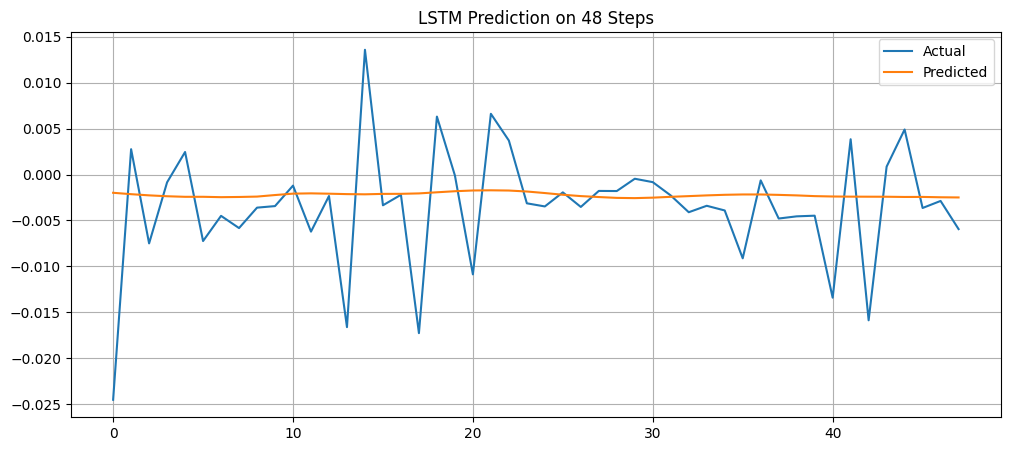

In [125]:
y_pred_lstm = lstm_regression(
    X_train_seq, y_train_seq,
    X_test_seq, y_test_seq,
    scalers_y
)